### Classify images of clothing using Fashion MNIST dataset
Refer to https://www.tensorflow.org/tutorials/keras/keras_tuner

Zalando Fashion-MNIST
Fashion-MNIST is a dataset curated by Zalando, consisting of grayscale images of various clothing articles. It includes 60,000 training images and 10,000 test images, each sized 28x28 pixels, and each image is labeled with one of 10 distinct classes. Designed as a drop-in replacement for the original MNIST dataset, Fashion-MNIST offers a more challenging benchmark for machine learning models, with the same data structure and image dimensions as MNIST.

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
tensorflow.__version__

'2.16.0-rc0'

In [102]:
# Loading DataSet
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()

In [103]:
x_train.shape
y_train.shape

(60000,)

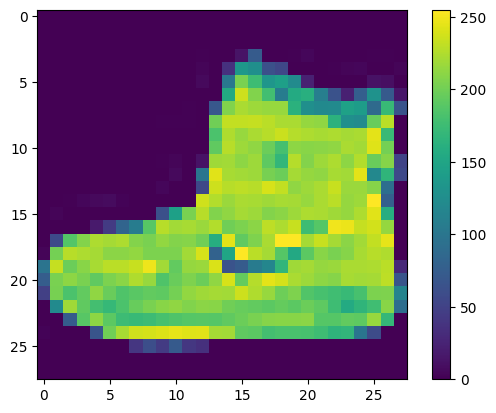

In [104]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [105]:
y_train[1]

0

#### Target Variable Handling in Multi-Class Classification

In multi-class classification, the target variable is transformed into a binary matrix (one-hot encoding), where each class is represented as a vector with a 1 for the correct class and 0 for all others.

The categorical_crossentropy loss function is then used, which calculates the difference between the predicted probability distribution and the one-hot encoded true labels. This approach is suitable for models with a softmax output layer that predicts probabilities for each class

In [106]:
y_train.shape

(60000,)

In [107]:
from tensorflow.keras.utils import to_categorical
y_train_ohe = to_categorical(y_train, num_classes=10)
y_train_ohe.shape

(60000, 10)

In [108]:
# alternative way to do one hot encoding
import tensorflow as tf
y_test_ohe = tf.one_hot(y_test, depth=10)
y_test_ohe.shape

TensorShape([10000, 10])

#### Benchmark ANN model
Starting by a benchmarked ANN model without optimising it.

In [109]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [110]:
print(f'Train set shape is: {x_train.shape}')
print(f'Test set shape is: {x_test.shape}')

Train set shape is: (60000, 28, 28)
Test set shape is: (10000, 28, 28)


In [111]:
# we need to flatten images and pass it to a FCN.
x_train_ann = x_train.reshape(60000, 28*28)
x_train_ann = x_train_ann / 255.0

x_test_ann = x_test.reshape(10000, 28*28)
x_test_ann = x_test_ann / 255.0

In [112]:
x_train_ann.shape

(60000, 784)

In [113]:
ann_model = keras.Sequential(name="ann_mnist")
ann_model.add(layers.Input(shape=(784,))) # this is the shape of each sample!
ann_model.add(layers.Dense(units = 512, activation = 'relu', name="first_layer"))

#output layer
ann_model.add(layers.Dense(units = 10, activation = 'softmax', name="output_layer"))

In [114]:
ann_model.summary()

Model: "ann_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ first_layer (Dense)             │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [115]:
ann_model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy', metrics=['accuracy'])

In [116]:
from tensorflow.keras.callbacks import  ModelCheckpoint
modelcheckpoint  = ModelCheckpoint(filepath="ANN_benchmark.keras",save_best_only=True, monitor="val_loss")
callback_list    = [modelcheckpoint]

In [117]:
ann_model.fit(x_train_ann, y_train_ohe, validation_data=(x_test_ann, y_test_ohe), epochs=20, batch_size=128, callbacks=callback_list)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7338 - loss: 0.7765 - val_accuracy: 0.7768 - val_loss: 0.5799
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8549 - loss: 0.3980 - val_accuracy: 0.8163 - val_loss: 0.4892
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8738 - loss: 0.3407 - val_accuracy: 0.8663 - val_loss: 0.3649
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8844 - loss: 0.3158 - val_accuracy: 0.8617 - val_loss: 0.3747
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8896 - loss: 0.2926 - val_accuracy: 0.8684 - val_loss: 0.3557
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8975 - loss: 0.2765 - val_accuracy: 0.8829 - val_loss: 0.3273
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9020 - loss: 0.2626 - val_accuracy: 0.8805 - val_loss: 0.3286
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9058 - loss: 0.2532 - val_accuracy: 0.

In [118]:
test_model = keras.models.load_model("ANN_benchmark.keras")
test_model.evaluate(x_test_ann, y_test_ohe)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.8827 - loss: 0.3294


[0.32848218083381653, 0.8828999996185303]

ANN accuracy in the test set is around 89%. We want to see how CNN improves this accuracy.

## Convolutional Neural Networks (CNN)

In [119]:
# reshaping
x_train.shape

(60000, 28, 28)

In [120]:
#Normalization

x_train = x_train.reshape((60000, 28,28,1))
x_train = x_train / 255.0

x_test = x_test.reshape((10000, 28,28,1))
x_test  = x_test / 255.0

In [121]:
x_train.shape

(60000, 28, 28, 1)

In [122]:
x_test.shape

(10000, 28, 28, 1)

#### Creating a CNN model:

Benchmark CNN Model without regularization (no drop out or data augmentation)


In [123]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [124]:
# Using functional api

def CNN_builder():
    inputs= keras.Input(shape=(28,28,1), name='Input layer')
    x = layers.Conv2D(filters= 32, kernel_size = 3, strides = (1,1) , padding='valid',  activation='relu' ,name="conv_layer_1")(inputs)
    x = layers.MaxPool2D(pool_size=2, name="pooling_1")(x)
    x = layers.Conv2D(filters= 64, kernel_size = 3, activation='relu', name="conv_layer_2")(x)
    x = layers.MaxPool2D(pool_size=2, name="pooling_2")(x)
    x = layers.Conv2D(filters= 128, kernel_size = 3, activation='relu', name="conv_layer_3")(x)
    x = layers.Flatten(name="flattening_layer")(x)

    outputs = layers.Dense(units= 10, activation='softmax', name='output_layer')(x)

    model = keras.Model(inputs= inputs , outputs=outputs, name='my_first_CNN_model')

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [125]:
model = CNN_builder()
model.summary()

Model: "my_first_CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_1 (Conv2D)           │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_2 (Conv2D)           │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_3 (Conv2D)           │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flattening_layer (Flatten)      │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

#### Model fit


In [126]:
from tensorflow.keras.callbacks import  ModelCheckpoint
modelcheckpoint  = ModelCheckpoint(filepath="CNN_basic.keras",save_best_only=True, monitor="val_loss")
callback_list    = [modelcheckpoint]

In [127]:
history = model.fit(x=x_train, y=y_train_ohe, validation_data=(x_test, y_test_ohe),
          epochs=20, batch_size=128, callbacks=callback_list)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6983 - loss: 0.8464 - val_accuracy: 0.8367 - val_loss: 0.4389
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8611 - loss: 0.3807 - val_accuracy: 0.8569 - val_loss: 0.3778
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8837 - loss: 0.3218 - val_accuracy: 0.8832 - val_loss: 0.3211
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8976 - loss: 0.2765 - val_accuracy: 0.8940 - val_loss: 0.2925
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9055 - loss: 0.2554 - val_accuracy: 0.8987 - val_loss: 0.2859
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9158 - loss: 0.2303 - val_accuracy: 0.8960 - val_loss: 0.2922
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9193 - loss: 0.2193 - val_accuracy: 0.8992 - val_loss: 0.2875
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9271 - loss: 0.1967 - val_accuracy: 0.

In [128]:
test_model = keras.models.load_model("CNN_basic.keras")
test_model.evaluate(x_test, y_test_ohe)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9082 - loss: 0.2776


[0.2632316052913666, 0.9107999801635742]

CNN performs better in the test set with 91% accuracy.

#### Model evaluation

In [129]:
model.metrics_names

['loss', 'compile_metrics']

In [130]:
metrics = pd.DataFrame(history.history)

In [131]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.781233,0.596690,0.8367,0.438934
1,0.866233,0.366162,0.8569,0.377791
2,0.888100,0.309486,0.8832,0.321103
3,0.897650,0.276851,0.8940,0.292507
4,0.907100,0.252842,0.8987,0.285874


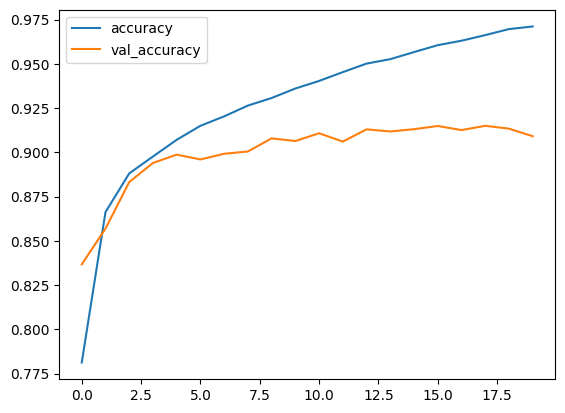

In [132]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

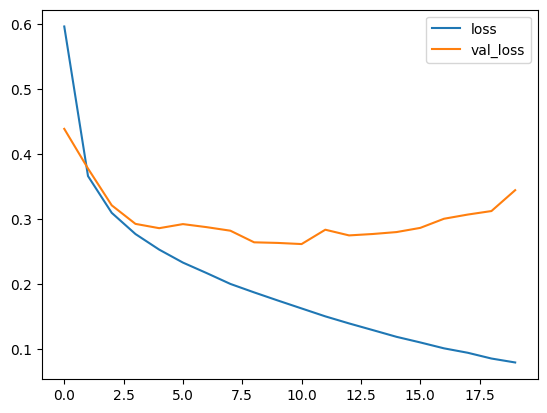

In [133]:
metrics[['loss','val_loss']].plot()
plt.show()

#### Data Augmentation

Using Data augmentation as a regularization technique to avoid overfitting caused by having too few samples to learn from. In Keras, this can be done by adding a number of data augmentation layers at the
start of your model.



In [134]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
    
    ]
)

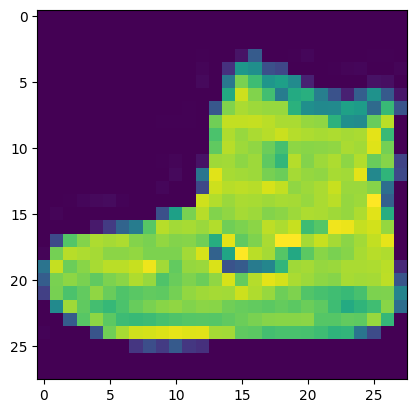

In [135]:
plt.imshow(x_train[0].reshape(28,28))
plt.show()

In [136]:
image = x_train[0]
image.shape

(28, 28, 1)

In [137]:
data_augmentation(image).numpy().shape

(28, 28, 1)

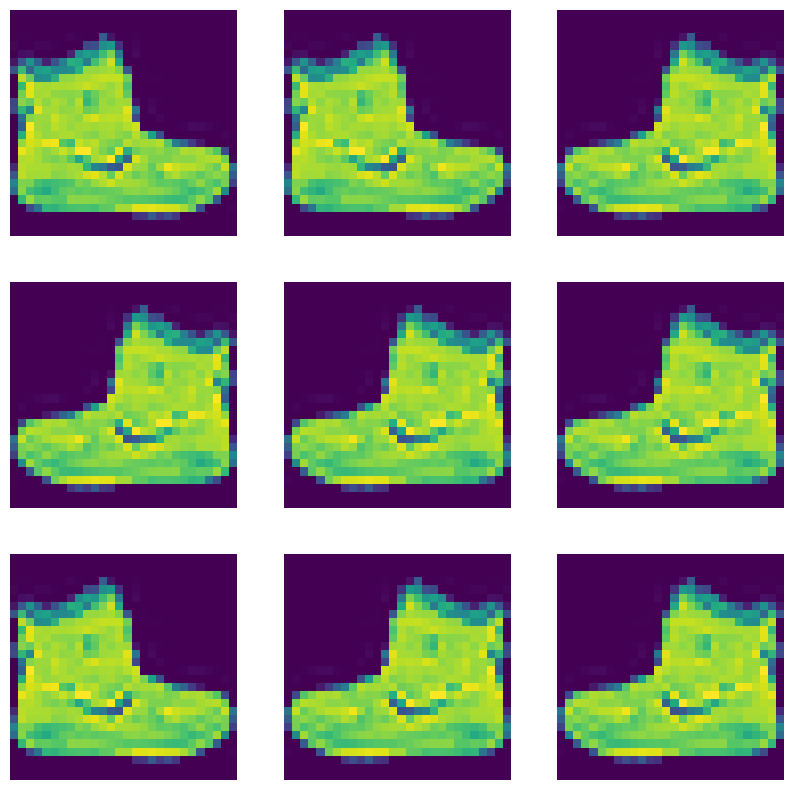

In [138]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_images = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)

    plt.imshow(augmented_images.numpy().reshape(28,28))
    plt.axis("off")

In [139]:
x= data_augmentation(x_train)
x.shape


TensorShape([60000, 28, 28])

In [140]:
x = tf.expand_dims(x, axis=-1)
x.shape

TensorShape([60000, 28, 28, 1])

In [141]:
x = tf.squeeze(x, axis=-1)
x.shape

TensorShape([60000, 28, 28])

In [142]:
def CNN_builder_augmented():
  inputs= keras.Input(shape=(28,28,1), name='Input layer')
  x = data_augmentation(inputs)
  x = layers.Rescaling(1./255)(x)  # Add rescaling to normalize the data
  # Explicitly set the shape to ensure the augmented data is in the correct format
  x = layers.Reshape((28, 28, 1))(x)
  x = layers.Conv2D(filters= 32, kernel_size = 3, strides = (1,1) , padding='valid',  activation='relu' ,name="conv_layer_1")(x)
  x = layers.MaxPool2D(pool_size=2, name="pooling_1")(x)
  x = layers.Conv2D(filters= 64, kernel_size = 3, activation='relu', name="conv_layer_2")(x)
  x = layers.MaxPool2D(pool_size=2, name="pooling_2")(x)
  x = layers.Conv2D(filters= 128, kernel_size = 3, activation='relu', name="conv_layer_3")(x)
  x = layers.Flatten(name="flattening_layer")(x)
  x = layers.Dropout(0.5)(x)

  outputs = layers.Dense(units= 10, activation='softmax', name='output_layer')(x)

  model = keras.Model(inputs= inputs , outputs=outputs, name='CNN_augmented_model')

  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [143]:
model_augmented = CNN_builder_augmented()
model_augmented.summary()


Model: "CNN_augmented_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_1 (Conv2D)           │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_2 (Conv2D)           │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_3 (Conv2D)           │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flattening_layer (Flatten)      │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

#### Model fit


In [144]:
from tensorflow.keras.callbacks import  ModelCheckpoint
modelcheckpoint  = ModelCheckpoint(filepath="CNN_augmented.keras",save_best_only=True, monitor="val_loss")
callback_list    = [modelcheckpoint]

In [145]:
history = model_augmented.fit(x=x_train, y=y_train_ohe, validation_data=(x_test, y_test_ohe),
          epochs=20, batch_size=128, callbacks=callback_list)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0979 - loss: 2.3028 - val_accuracy: 0.1539 - val_loss: 2.2998
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2733 - loss: 2.0492 - val_accuracy: 0.5740 - val_loss: 1.1583
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5479 - loss: 1.1705 - val_accuracy: 0.6334 - val_loss: 1.0154
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6306 - loss: 0.9928 - val_accuracy: 0.6897 - val_loss: 0.8496
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6801 - loss: 0.8400 - val_accuracy: 0.7255 - val_loss: 0.7484
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7186 - loss: 0.7468 - val_accuracy: 0.7468 - val_loss: 0.6992
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7396 - loss: 0.6921 - val_accuracy: 0.7560 - val_loss: 0.6743
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7560 - loss: 0.6514 - val_accuracy: 0

In [146]:
model_augmented.evaluate(x_test, y_test_ohe)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8274 - loss: 0.4839


[0.4813871681690216, 0.82669997215271]

Data augmentation had minimal impact due to the large training set (60,000 images), low-resolution, centered images, and the use of dropout, which requires longer training (50+ epochs). This method also doesn’t fully leverage GPU acceleration.

#### Model evaluation

In [147]:
metrics = pd.DataFrame(history.history)

In [148]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.100017,2.302637,0.1539,2.299766
1,0.391200,1.720650,0.5740,1.158299
2,0.569917,1.126229,0.6334,1.015395
3,0.646667,0.946506,0.6897,0.849632
4,0.692050,0.814904,0.7255,0.748439


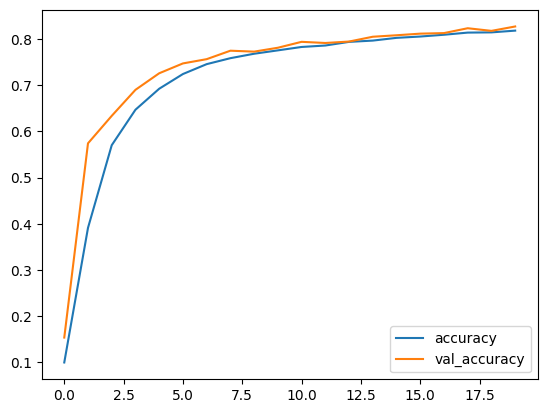

In [149]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

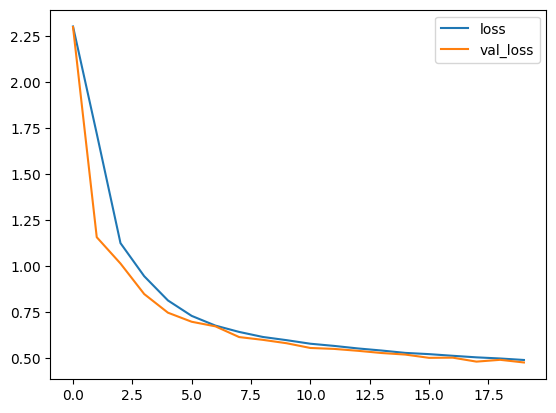

In [150]:
metrics[['loss','val_loss']].plot()
plt.show()